In [57]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [58]:
tf.config.list_physical_devices('GPU') # to check if tf detects my GPU

In [81]:
# Parameters
batch_size = 16
image_height = 256
image_width = 256
n_cheeses = 5
n_epochs = 40
folder_path = r"all_images\full_datasets_preprocessed"

# Uncomment if want to experiment with the truncated dataset
#folder_path = r"all_images\full_datasets_preprocessed_wo_beaufort"
#n_cheeses = 4

# Useful functions
def load_images_paths(path):
    '''Load the path to each image in an array'''
    images_array = [os.path.join(folder_path,file) for file in os.listdir(path)]
    return images_array

def load_image(path):
    '''Load one image using its path'''
    image = cv2.imread(path)
    return image

def display_image(image):
    '''Display one image'''
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2 is BGR and pyplot RGB so need to convert to display
    plt.imshow(image_rgb)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def normalize_image(image):
    normalized_image= cv2.normalize(image, 0, 255, dtype = cv2.CV_32F) # if not using float data type then rounds up to either 0 or 1 integers
    return normalized_image

In [79]:
# Loading the datasets
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(folder_path, validation_split = 0.2, subset = "training", seed = 123, image_size = (image_height, image_width), batch_size = batch_size)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(folder_path, validation_split = 0.2, subset = "validation", seed = 123, image_size = (image_height, image_width), batch_size = batch_size)
labels = training_dataset.class_names

Found 1425 files belonging to 4 classes.
Using 1140 files for training.
Found 1425 files belonging to 4 classes.
Using 285 files for validation.


In [61]:
# Building the model
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"), # 32 = number of filters, 3 = kernel size,
                                                                 # padding = not to reduce dimension when using the
                                                                 # kernels
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])

# Training/validation
history = model.fit(training_dataset,
                    validation_data = validation_dataset,
                    epochs = n_epochs)

model.summary()

Epoch 1/40
92/92 [==============================] - 9s 99ms/step - loss: 1.6152 - accuracy: 0.3141 - val_loss: 1.4862 - val_accuracy: 0.3049
Epoch 2/40
92/92 [==============================] - 5s 51ms/step - loss: 1.3276 - accuracy: 0.4156 - val_loss: 1.2813 - val_accuracy: 0.4505
Epoch 3/40
92/92 [==============================] - 5s 50ms/step - loss: 1.1776 - accuracy: 0.4952 - val_loss: 1.3032 - val_accuracy: 0.4973
Epoch 4/40
92/92 [==============================] - 5s 51ms/step - loss: 0.9667 - accuracy: 0.6049 - val_loss: 1.2725 - val_accuracy: 0.5330
Epoch 5/40
92/92 [==============================] - 5s 51ms/step - loss: 0.7130 - accuracy: 0.7250 - val_loss: 1.5077 - val_accuracy: 0.4121
Epoch 6/40
92/92 [==============================] - 5s 51ms/step - loss: 0.5483 - accuracy: 0.7853 - val_loss: 1.6811 - val_accuracy: 0.5247
Epoch 7/40
92/92 [==============================] - 5s 51ms/step - loss: 0.3355 - accuracy: 0.8779 - val_loss: 2.2493 - val_accuracy: 0.5522
Epoch 8/40
92

Text(0.5, 1.0, 'Training and validation losses')

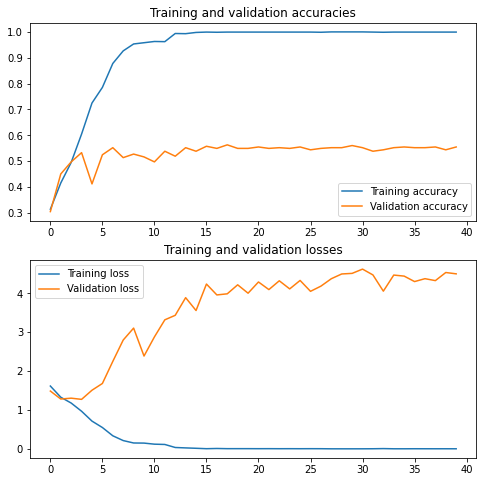

In [62]:
# Some graphs about accuracy
accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs), accuracy, label="Training accuracy")
plt.plot(range(n_epochs), validation_accuracy, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs), loss, label="Training loss")
plt.plot(range(n_epochs), validation_loss, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

#plt.savefig("cnn1")

In [63]:
# Building another model - with dropout layer to avoid overfitting
model2 = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"), # 32 = number of filters, 3 = kernel size,
                                                                 # padding = not to reduce dimension when using the
                                                                 # kernels
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model2.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])

# Training/validation
history2 = model2.fit(training_dataset,
                      validation_data = validation_dataset,
                      epochs = n_epochs) # Train this one a little longer 

Epoch 1/40
92/92 [==============================] - 5s 56ms/step - loss: 1.7038 - accuracy: 0.2551 - val_loss: 1.5442 - val_accuracy: 0.3269
Epoch 2/40
92/92 [==============================] - 5s 54ms/step - loss: 1.4045 - accuracy: 0.3656 - val_loss: 1.4669 - val_accuracy: 0.3681
Epoch 3/40
92/92 [==============================] - 5s 54ms/step - loss: 1.2541 - accuracy: 0.4451 - val_loss: 1.3419 - val_accuracy: 0.4588
Epoch 4/40
92/92 [==============================] - 5s 54ms/step - loss: 1.0765 - accuracy: 0.5473 - val_loss: 1.3110 - val_accuracy: 0.4945
Epoch 5/40
92/92 [==============================] - 5s 53ms/step - loss: 0.9362 - accuracy: 0.6200 - val_loss: 1.2358 - val_accuracy: 0.5522
Epoch 6/40
92/92 [==============================] - 5s 54ms/step - loss: 0.6355 - accuracy: 0.7538 - val_loss: 1.2987 - val_accuracy: 0.5577
Epoch 7/40
92/92 [==============================] - 5s 54ms/step - loss: 0.4620 - accuracy: 0.8265 - val_loss: 1.3710 - val_accuracy: 0.5275
Epoch 8/40
92

Text(0.5, 1.0, 'Training and validation losses')

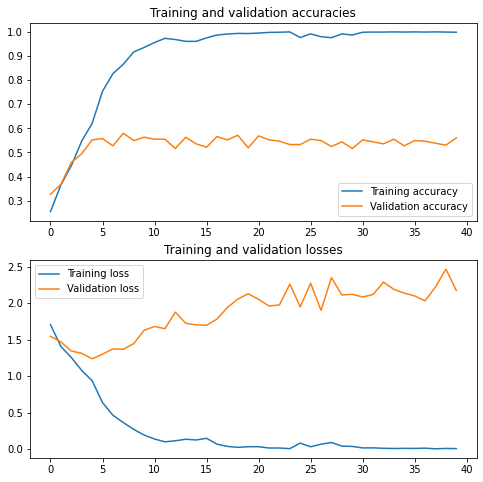

In [64]:
# Some graphs about accuracy
accuracy2 = history2.history["accuracy"]
validation_accuracy2 = history2.history["val_accuracy"]
loss2 = history2.history["loss"]
validation_loss2 = history2.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs), accuracy2, label="Training accuracy")
plt.plot(range(n_epochs), validation_accuracy2, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs), loss2, label="Training loss")
plt.plot(range(n_epochs), validation_loss2, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

#plt.savefig("cnn2")

In [65]:
# Building another model - with data augmentation to get more images
model3 = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (image_height, image_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"), # 32 = number of filters, 3 = kernel size,
                                                                 # padding = not to reduce dimension when using the
                                                                 # kernels
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model3.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])
#n_epochs = 100
# Training/validation
history3 = model3.fit(training_dataset,
                      validation_data = validation_dataset,
                      epochs = n_epochs)

Epoch 1/40
92/92 [==============================] - 5s 54ms/step - loss: 1.6779 - accuracy: 0.2572 - val_loss: 1.5740 - val_accuracy: 0.2527
Epoch 2/40
92/92 [==============================] - 5s 54ms/step - loss: 1.4836 - accuracy: 0.3155 - val_loss: 1.6567 - val_accuracy: 0.2225
Epoch 3/40
92/92 [==============================] - 5s 53ms/step - loss: 1.4137 - accuracy: 0.3793 - val_loss: 1.4429 - val_accuracy: 0.3654
Epoch 4/40
92/92 [==============================] - 5s 53ms/step - loss: 1.3494 - accuracy: 0.4136 - val_loss: 1.5400 - val_accuracy: 0.3516
Epoch 5/40
92/92 [==============================] - 5s 53ms/step - loss: 1.2590 - accuracy: 0.4527 - val_loss: 1.3345 - val_accuracy: 0.4753
Epoch 6/40
92/92 [==============================] - 5s 54ms/step - loss: 1.2642 - accuracy: 0.4458 - val_loss: 1.2514 - val_accuracy: 0.4725
Epoch 7/40
92/92 [==============================] - 5s 54ms/step - loss: 1.1770 - accuracy: 0.4801 - val_loss: 1.2489 - val_accuracy: 0.4918
Epoch 8/40
92

In [ ]:
# Some graphs about accuracy
accuracy3 = history3.history["accuracy"]
validation_accuracy3 = history3.history["val_accuracy"]
loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs), accuracy3, label="Training accuracy")
plt.plot(range(n_epochs), validation_accuracy3, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs), loss3, label="Training loss")
plt.plot(range(n_epochs), validation_loss3, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

#plt.savefig("cnn3")

In [ ]:
# Comparing all 3 models on validation accuracy
plt.plot(range(n_epochs), validation_accuracy, label="Model 1")
plt.plot(range(n_epochs), validation_accuracy2, label="Model 2 (with dropout)")
plt.plot(range(n_epochs), validation_accuracy3, label="Model 3 (with data augmentation)")
plt.legend(loc="best")
plt.title("Validation accuracies for the first 3 CNN models")

plt.savefig("cnn4")

In [82]:
# Testing another architecture - VGG 16
n_epochs_VGG = 40
model4 = tf.keras.Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255),
    #layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (image_height, image_width, 3)),
    #layers.experimental.preprocessing.RandomRotation(0.1),
    #layers.experimental.preprocessing.RandomZoom(0.1),
    layers.Conv2D(8, 3, padding = "same", activation = "relu"), 
    layers.Conv2D(8, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding = "same", activation = "relu"),
    layers.Conv2D(16, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model4.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])

# Training/validation
history4 = model4.fit(training_dataset,
                      validation_data = validation_dataset,
                      epochs = n_epochs_VGG) # Train this one a little longer  


Epoch 1/40
72/72 [==============================] - 4s 60ms/step - loss: 1.4598 - accuracy: 0.2939 - val_loss: 1.4395 - val_accuracy: 0.2596
Epoch 2/40
72/72 [==============================] - 4s 57ms/step - loss: 1.3902 - accuracy: 0.3044 - val_loss: 1.3656 - val_accuracy: 0.3439
Epoch 3/40
72/72 [==============================] - 4s 57ms/step - loss: 1.3027 - accuracy: 0.3737 - val_loss: 1.2228 - val_accuracy: 0.4246
Epoch 4/40
72/72 [==============================] - 4s 57ms/step - loss: 1.0984 - accuracy: 0.5000 - val_loss: 1.0750 - val_accuracy: 0.5649
Epoch 5/40
72/72 [==============================] - 4s 57ms/step - loss: 0.9511 - accuracy: 0.5465 - val_loss: 1.0124 - val_accuracy: 0.5053
Epoch 6/40
72/72 [==============================] - 4s 58ms/step - loss: 0.9520 - accuracy: 0.5912 - val_loss: 0.9353 - val_accuracy: 0.6211
Epoch 7/40
72/72 [==============================] - 4s 57ms/step - loss: 0.8316 - accuracy: 0.6325 - val_loss: 0.9940 - val_accuracy: 0.6035
Epoch 8/40
72

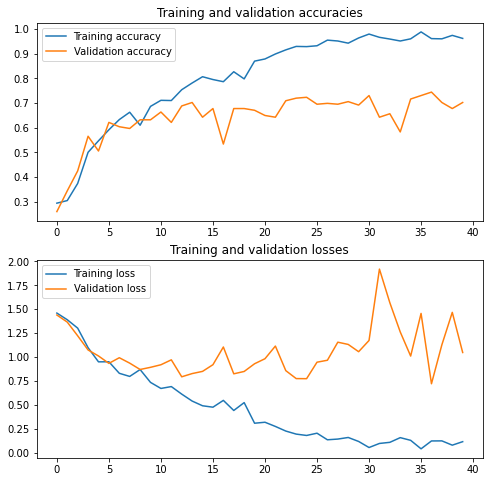

In [83]:
# Some graphs about accuracy
accuracy4 = history4.history["accuracy"]
validation_accuracy4 = history4.history["val_accuracy"]
loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs_VGG), accuracy4, label="Training accuracy")
plt.plot(range(n_epochs_VGG), validation_accuracy4, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs_VGG), loss4, label="Training loss")
plt.plot(range(n_epochs_VGG), validation_loss4, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

plt.savefig("cnn_vgg1_dropouts")

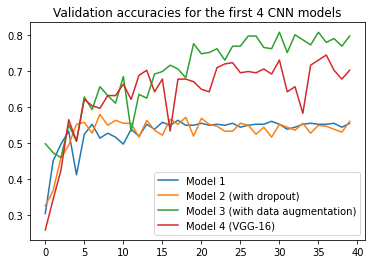

In [84]:
# Comparing all 4 models
plt.plot(range(n_epochs), validation_accuracy, label="Model 1")
plt.plot(range(n_epochs), validation_accuracy2, label="Model 2 (with dropout)")
plt.plot(range(n_epochs), validation_accuracy3, label="Model 3 (with data augmentation)")
plt.plot(range(n_epochs_VGG), validation_accuracy4, label="Model 4 (VGG-16)")
plt.legend(loc="best")
plt.title("Validation accuracies for the first 4 CNN models")

plt.savefig("cnn5")